In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('./music_genre.csv')

In [37]:
# Clean table of instance_id, artist_name, track_name, key, mode, and obtained_date
df = df.drop(['instance_id', 'artist_name', 'track_name', 'key', 'mode', 'obtained_date', 'popularity'], axis=1)

# Clean table of songs with negative duration
negative_lengths = df[df['duration_ms'] < 0].index
df.drop(negative_lengths, inplace=True)

# Clean table of songs with unknown tempo
unknown_tempo = df[df['tempo'] == '?'].index
df.drop(unknown_tempo, inplace=True)

# Clean table of songs with NaN values
df = df.dropna()

# Round tempos
def df_value_round(x):
    x = float(x)
    return round(x)

df['tempo'] = df['tempo'].apply(df_value_round)

# convert duration_ms to durastion_secs
def ms_to_s(x):
    x = float(x)
    return x / 1000

df['duration_ms'] = df['duration_ms'].apply(ms_to_s)
df = df.rename(columns={'duration_ms': 'duration_secs'})

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
features = df.drop('music_genre', axis=1)
results = df['music_genre']
normalize = MinMaxScaler()
normalize.fit(features)
normalized = normalize.fit_transform(features)
normalized_df = pd.DataFrame(normalized, columns=features.columns)
df = normalized_df
df['music_genre'] = results

# Clean table of songs with NaN values
df = df.dropna()

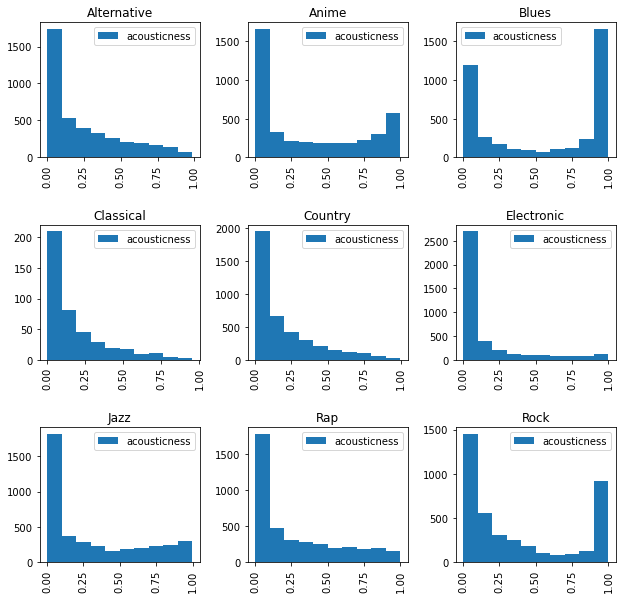

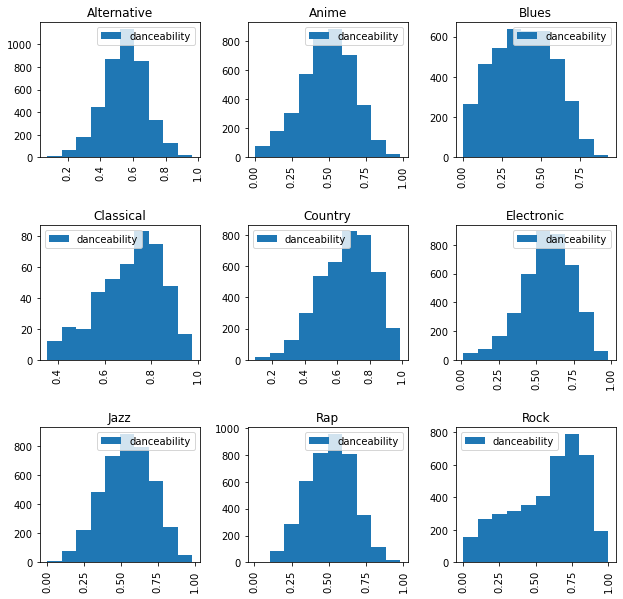

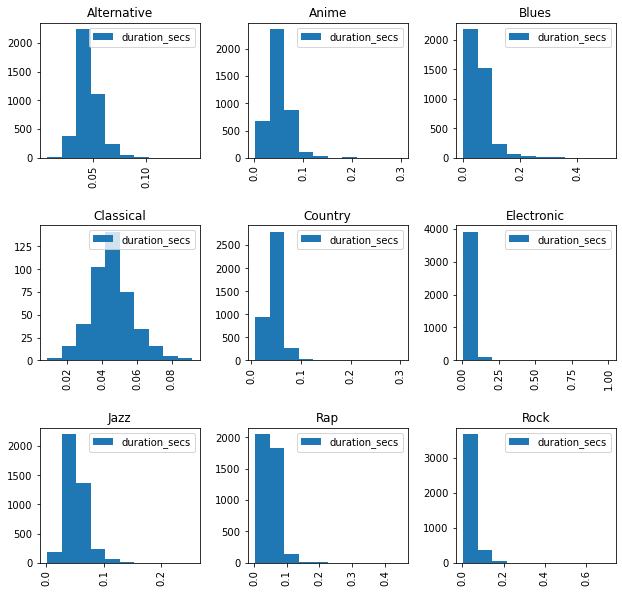

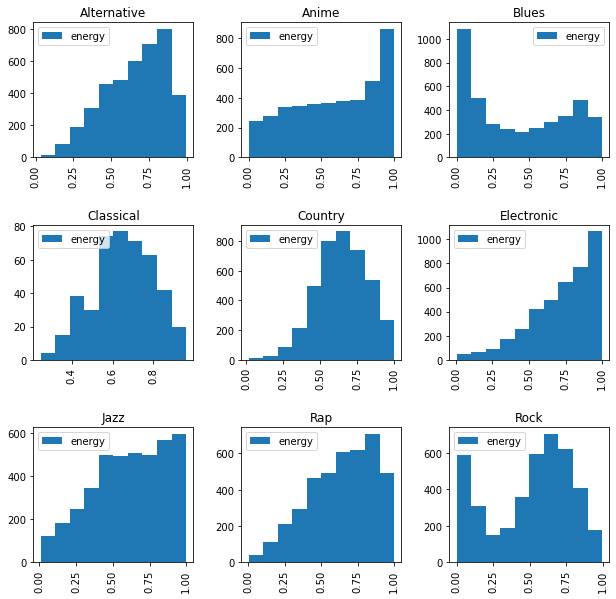

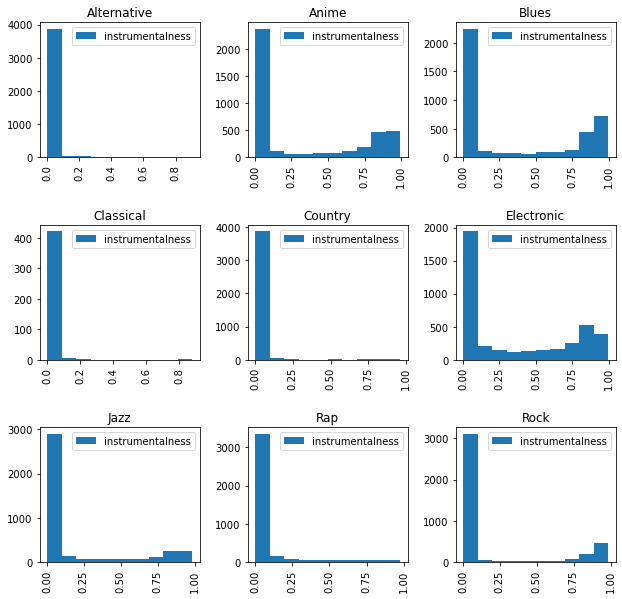

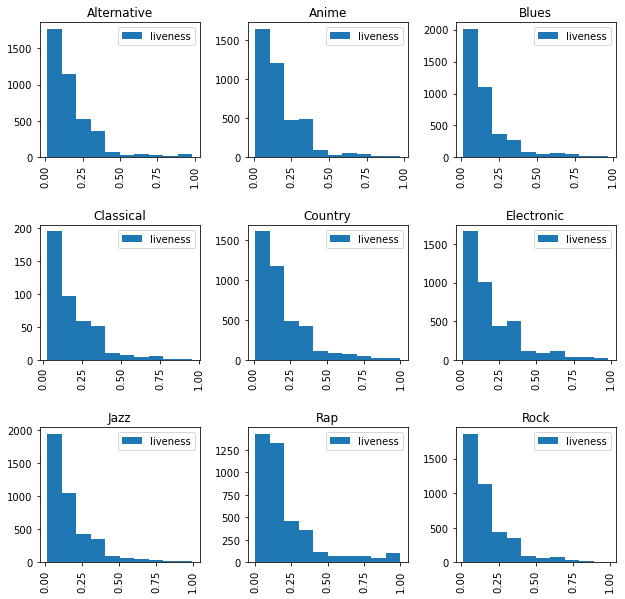

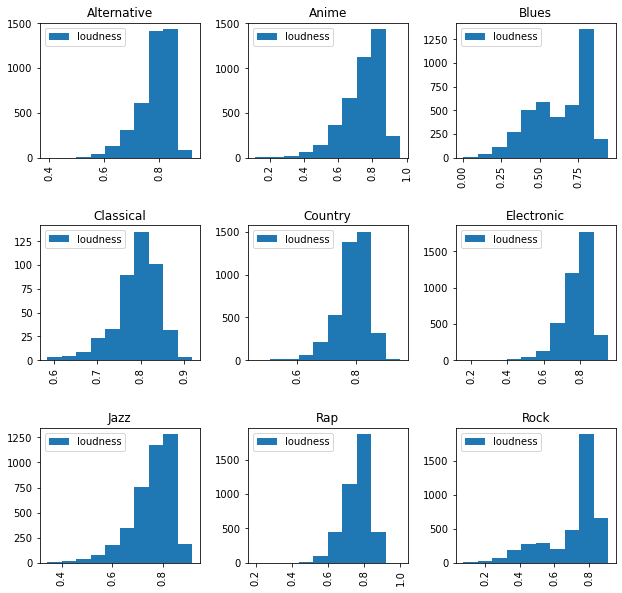

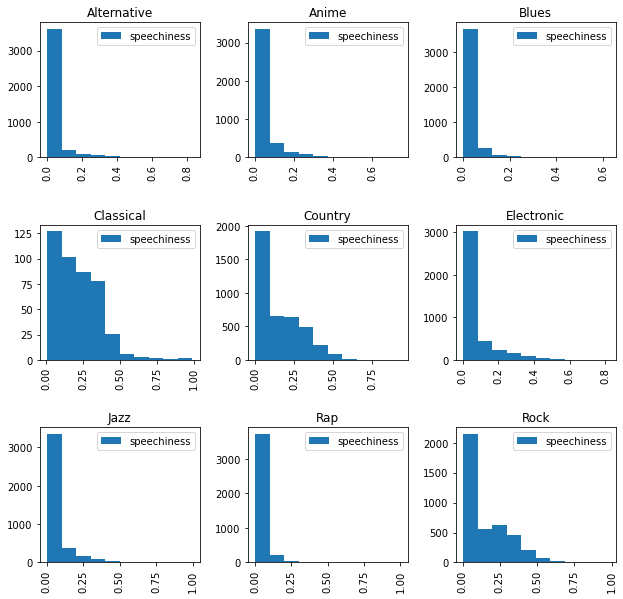

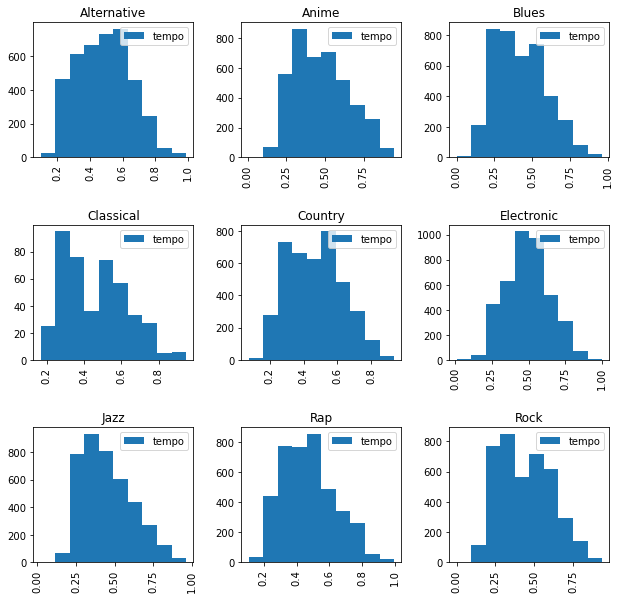

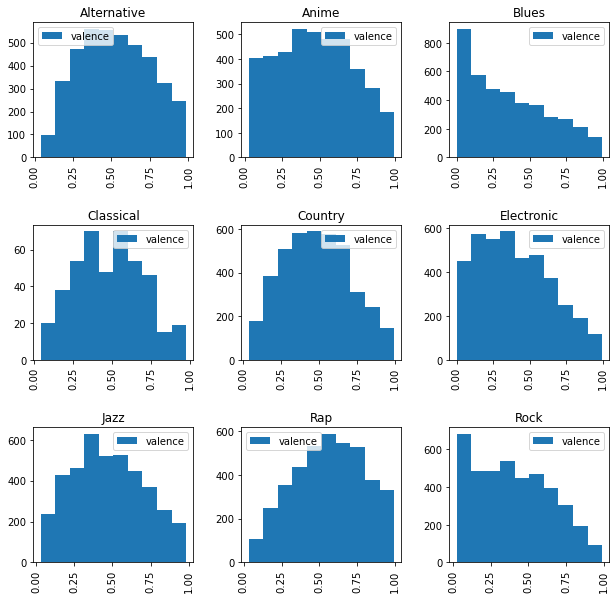

In [40]:
# histograms of each genre
training_features = df.drop(['music_genre'], axis=1)
for col in training_features:
    hist = df.hist(column=col, by=df['music_genre'], figsize=(10,10), legend=True)

In [41]:
# split data into test and train
train_df, test_df = train_test_split(df, test_size=.25, shuffle=True)

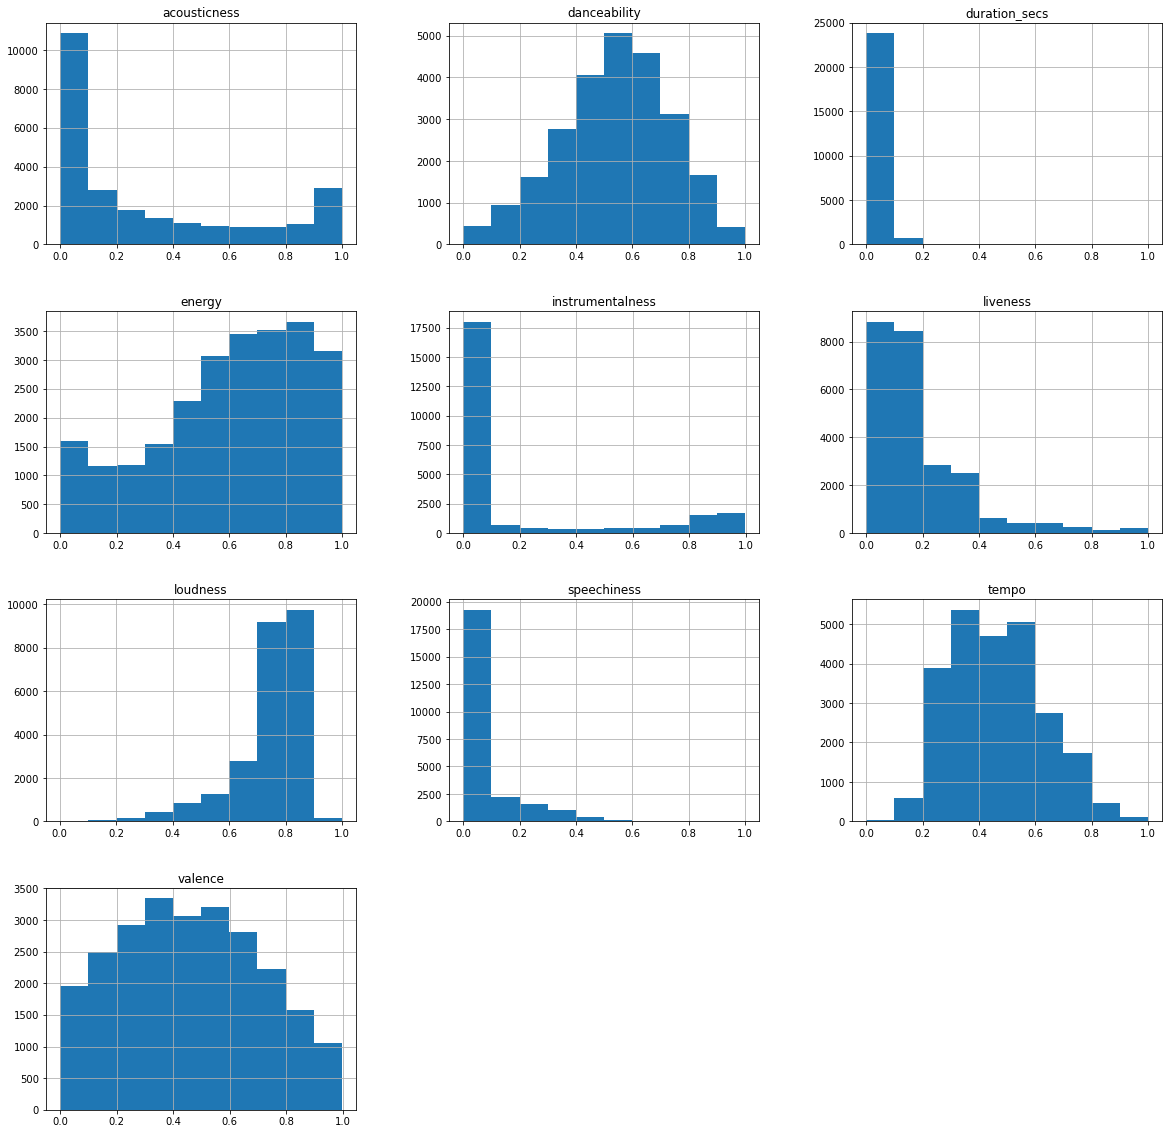

In [42]:
# histograms of training data
histograms = train_df.hist(figsize=(20, 20))

In [43]:
# Descriptive Stats - Mean
df.groupby(['music_genre']).mean()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.248420,0.548002,0.045775,0.656426,0.019539,0.182605,0.785930,0.039866,0.484911,0.522387
Anime,0.366874,0.490715,0.050983,0.594775,0.304492,0.178221,0.745463,0.050868,0.470970,0.470615
Blues,0.549442,0.388058,0.058245,0.418771,0.338381,0.166007,0.635418,0.032925,0.421902,0.363973
Classical,0.177713,0.709405,0.045659,0.651486,0.013418,0.191651,0.791698,0.211306,0.458959,0.484725
Country,0.197992,0.655095,0.046564,0.646008,0.021360,0.195551,0.788467,0.154028,0.465921,0.484060
Electronic,0.155069,0.572599,0.055152,0.726176,0.341892,0.200102,0.784178,0.076144,0.493448,0.402713
Jazz,0.303772,0.543752,0.051563,0.611899,0.184275,0.177536,0.759679,0.065359,0.448963,0.475405
Rap,0.273379,0.508266,0.051883,0.638667,0.083110,0.208942,0.760614,0.040126,0.472351,0.561954
Rock,0.384396,0.580016,0.051278,0.509167,0.186437,0.179474,0.707300,0.149604,0.438923,0.401692


In [44]:
# Descriptive Stats - Median
df.groupby(['music_genre']).median()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.145582,0.553109,0.044240,0.689443,0.000002,0.120495,0.799882,0.015549,0.478495,0.513105
Anime,0.213855,0.499136,0.050372,0.634345,0.007023,0.118476,0.769147,0.024464,0.462366,0.467742
Blues,0.706325,0.386874,0.049039,0.361856,0.020532,0.107368,0.683402,0.021529,0.403226,0.320565
Classical,0.100100,0.736075,0.044505,0.656885,0.000000,0.130593,0.799980,0.185604,0.451613,0.491431
Country,0.108434,0.671848,0.044612,0.650373,0.000000,0.127564,0.796968,0.106230,0.462366,0.480847
Electronic,0.029116,0.585492,0.050938,0.777601,0.130522,0.122515,0.801359,0.035446,0.494624,0.373992
Jazz,0.152610,0.547712,0.048623,0.630338,0.000950,0.114437,0.776777,0.027726,0.424731,0.459677
Rap,0.145582,0.514788,0.047455,0.668406,0.000391,0.123524,0.773499,0.021746,0.462366,0.568044
Rock,0.210843,0.643782,0.045999,0.572233,0.000003,0.114437,0.777358,0.086659,0.430108,0.383065


In [45]:
# Descriptive Stats - Standard Deviation
df.groupby(['music_genre']).median()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.145582,0.553109,0.044240,0.689443,0.000002,0.120495,0.799882,0.015549,0.478495,0.513105
Anime,0.213855,0.499136,0.050372,0.634345,0.007023,0.118476,0.769147,0.024464,0.462366,0.467742
Blues,0.706325,0.386874,0.049039,0.361856,0.020532,0.107368,0.683402,0.021529,0.403226,0.320565
Classical,0.100100,0.736075,0.044505,0.656885,0.000000,0.130593,0.799980,0.185604,0.451613,0.491431
Country,0.108434,0.671848,0.044612,0.650373,0.000000,0.127564,0.796968,0.106230,0.462366,0.480847
Electronic,0.029116,0.585492,0.050938,0.777601,0.130522,0.122515,0.801359,0.035446,0.494624,0.373992
Jazz,0.152610,0.547712,0.048623,0.630338,0.000950,0.114437,0.776777,0.027726,0.424731,0.459677
Rap,0.145582,0.514788,0.047455,0.668406,0.000391,0.123524,0.773499,0.021746,0.462366,0.568044
Rock,0.210843,0.643782,0.045999,0.572233,0.000003,0.114437,0.777358,0.086659,0.430108,0.383065


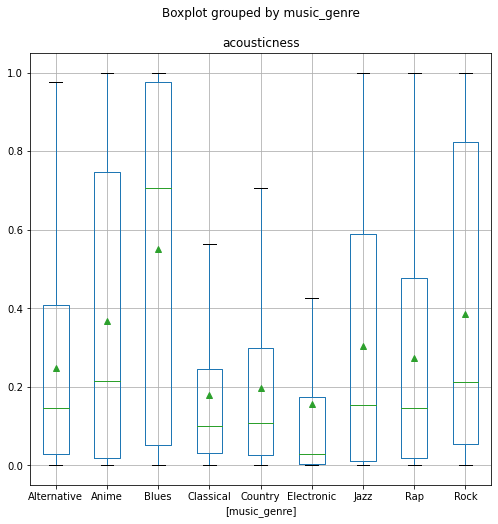

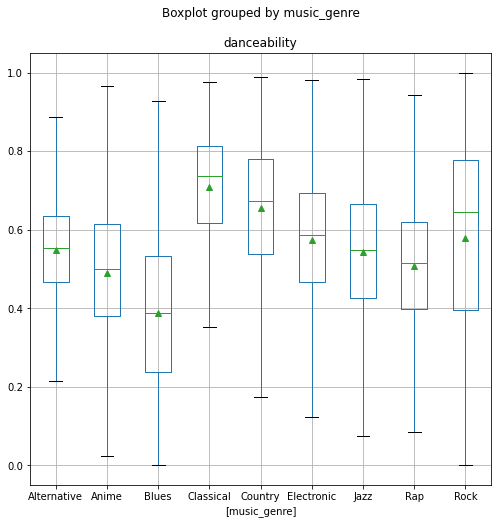

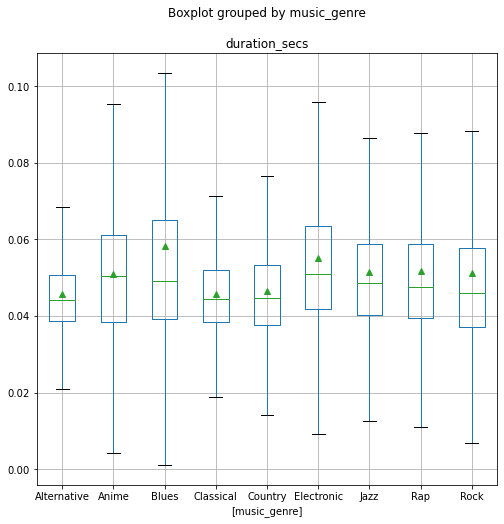

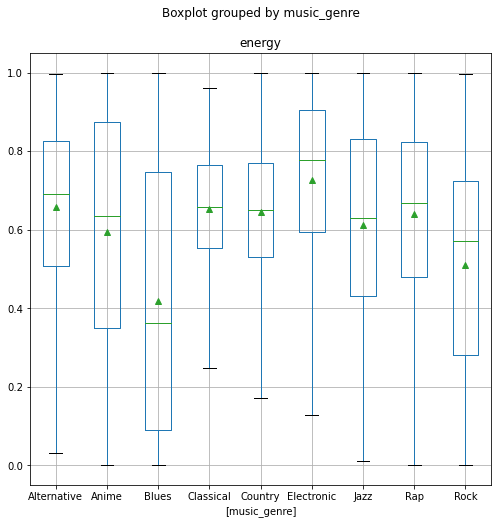

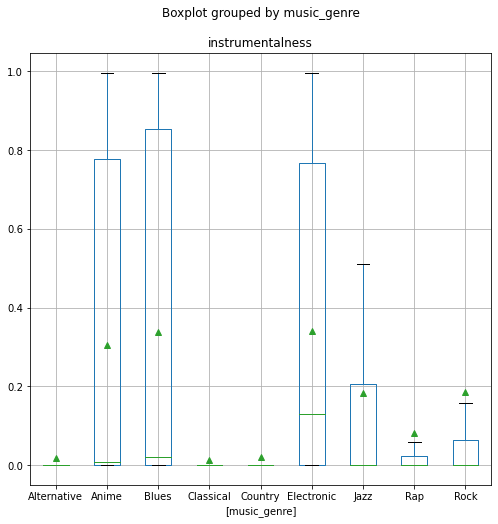

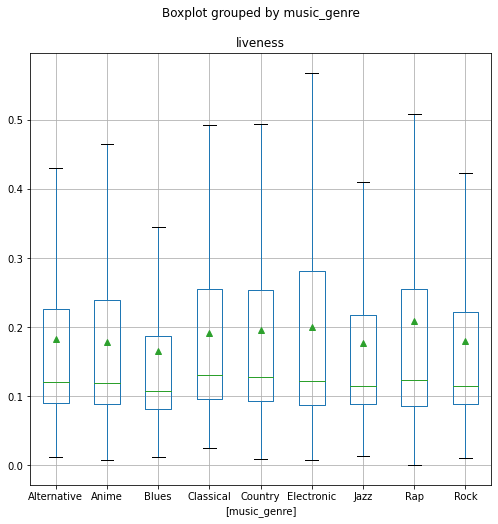

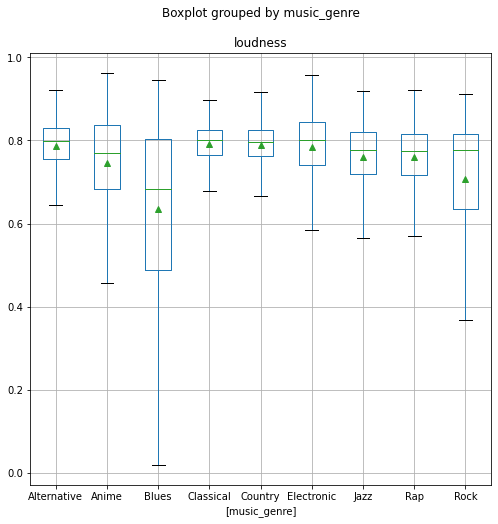

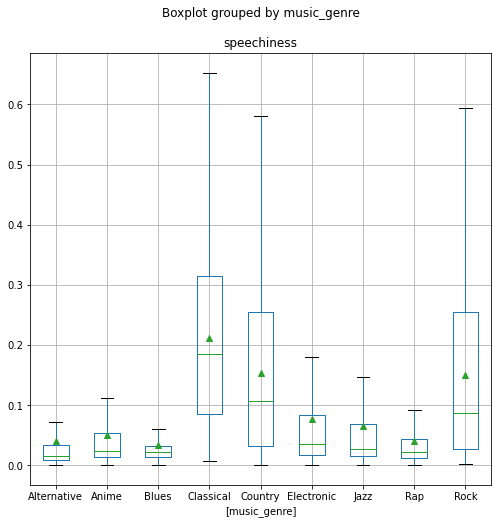

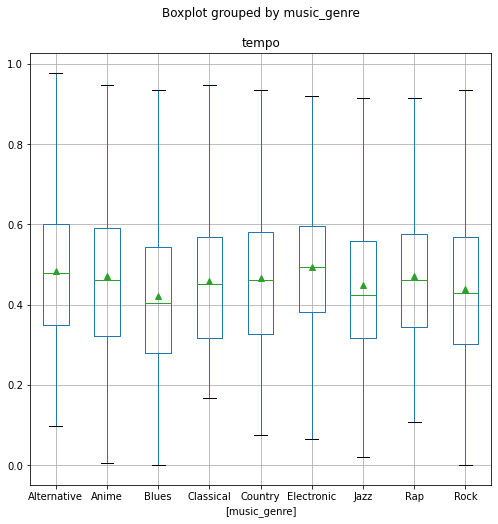

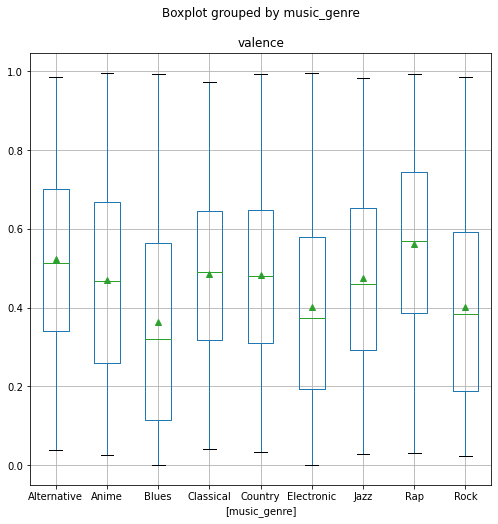

In [46]:
# Boxplots
training_features = train_df.drop(['music_genre'], axis=1)
for col in training_features:
    boxplot = df.boxplot(column=[col], by=['music_genre'], figsize=(8,8), showfliers=False, showmeans=True)

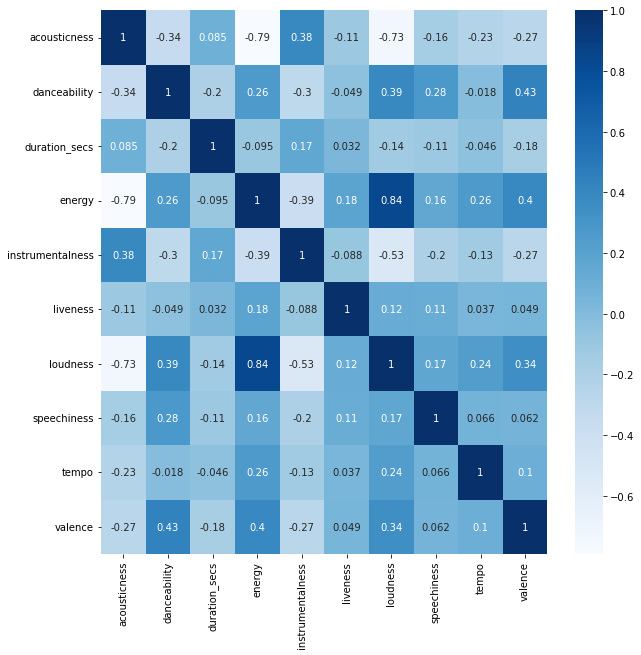

In [47]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [49]:
knn_model = KNeighborsClassifier(5)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 5:')
print(metrics.classification_report(training_labels,predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 5:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))




training set when k = 5:
              precision    recall  f1-score   support

 Alternative       0.39      0.71      0.51      2997
       Anime       0.46      0.53      0.50      3074
       Blues       0.54      0.55      0.54      3067
   Classical       0.37      0.17      0.23       326
     Country       0.50      0.52      0.51      2959
  Electronic       0.64      0.55      0.59      3056
        Jazz       0.48      0.34      0.40      3010
         Rap       0.55      0.43      0.48      3045
        Rock       0.58      0.41      0.48      3126

    accuracy                           0.50     24660
   macro avg       0.50      0.47      0.47     24660
weighted avg       0.52      0.50      0.50     24660

[[2127  136   96    4  128   73  137  217   79]
 [ 485 1639  215    0   58  223  210  173   71]
 [ 529  276 1678    0   52   85  144  156  147]
 [  26   12   10   54  126   12   11    6   69]
 [ 447  150   85   35 1550   81  126  144  341]
 [ 328  392  144   11  156 169

In [50]:
knn_model = KNeighborsClassifier(1000)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 1000:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 1000:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))


training set when k = 1000:


/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Alternative       0.24      0.69      0.36      2997
       Anime       0.33      0.16      0.22      3074
       Blues       0.45      0.45      0.45      3067
   Classical       0.00      0.00      0.00       326
     Country       0.35      0.49      0.41      2959
  Electronic       0.46      0.47      0.46      3056
        Jazz       0.23      0.09      0.13      3010
         Rap       0.34      0.31      0.32      3045
        Rock       0.39      0.06      0.10      3126

    accuracy                           0.33     24660
   macro avg       0.31      0.30      0.27     24660
weighted avg       0.35      0.33      0.30     24660

[[2065   97   19    0  198   88  125  387   18]
 [ 962  497  488    0   81  539  195  304    8]
 [ 898  132 1390    0   66  139  147  292    3]
 [  42    4    0    0  223   12    6    7   32]
 [ 819   73    5    0 1445  122   94  255  146]
 [ 692  216  121    0  288 1424  119  160   36]
 [1079 

/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
knn_model = KNeighborsClassifier(1000)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 1000:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 1000:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set when k = 1000:


/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

 Alternative       0.24      0.69      0.36      2997
       Anime       0.33      0.16      0.22      3074
       Blues       0.45      0.45      0.45      3067
   Classical       0.00      0.00      0.00       326
     Country       0.35      0.49      0.41      2959
  Electronic       0.46      0.47      0.46      3056
        Jazz       0.23      0.09      0.13      3010
         Rap       0.34      0.31      0.32      3045
        Rock       0.39      0.06      0.10      3126

    accuracy                           0.33     24660
   macro avg       0.31      0.30      0.27     24660
weighted avg       0.35      0.33      0.30     24660

[[2065   97   19    0  198   88  125  387   18]
 [ 962  497  488    0   81  539  195  304    8]
 [ 898  132 1390    0   66  139  147  292    3]
 [  42    4    0    0  223   12    6    7   32]
 [ 819   73    5    0 1445  122   94  255  146]
 [ 692  216  121    0  288 1424  119  160   36]
 [1079 

/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/clopez/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
model = GaussianNB()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
model.fit(training_features, training_labels)
predicted = model.predict(training_features)

print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

print('testing set:')
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
predicted = model.predict(testing_features)
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.22      0.77      0.35      2997
       Anime       0.28      0.08      0.13      3074
       Blues       0.35      0.49      0.41      3067
   Classical       0.00      0.00      0.00       326
     Country       0.33      0.54      0.41      2959
  Electronic       0.49      0.30      0.37      3056
        Jazz       0.28      0.03      0.05      3010
         Rap       0.31      0.18      0.22      3045
        Rock       0.17      0.02      0.04      3126

    accuracy                           0.29     24660
   macro avg       0.27      0.27      0.22     24660
weighted avg       0.30      0.29      0.24     24660

[[2305   36  155    0  221   50   16  190   24]
 [1157  255  820    0  174  323   61  238   46]
 [1146   43 1512    0   66   88   15  168   29]
 [  61    0    1    0  252    3    1    4    4]
 [1015   34   51   20 1590   48   19  138   44]
 [ 965  159  300    3  432  915   50  186

In [54]:
from sklearn.neighbors import NearestCentroid

In [55]:
centroid_model = NearestCentroid()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
centroid_model.fit(training_features, training_labels)

predicted = centroid_model.predict(training_features)
print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = centroid_model.predict(testing_features)
print('testing set:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.24      0.44      0.31      2997
       Anime       0.29      0.04      0.07      3074
       Blues       0.31      0.52      0.39      3067
   Classical       0.06      0.63      0.11       326
     Country       0.22      0.19      0.21      2959
  Electronic       0.44      0.40      0.42      3056
        Jazz       0.24      0.01      0.02      3010
         Rap       0.32      0.27      0.30      3045
        Rock       0.12      0.08      0.09      3126

    accuracy                           0.25     24660
   macro avg       0.25      0.29      0.21     24660
weighted avg       0.27      0.25      0.22     24660

[[1312   10  279  133  305   99   23  478  358]
 [ 802  127  956   79  164  478   20  269  179]
 [ 686   15 1580   47  183  153   12  261  130]
 [  10    0    2  207   63    5    1   12   26]
 [ 381   13   78 1205  575   91   12  259  345]
 [ 475   77  342  377  346 1215   15  138